### Import Data & required Packages

In [1]:
## import pandas, numpy, Matplotlib, seaborn & Warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -r requirements.txt

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement adaboost (from versions: none)
ERROR: No matching distribution found for adaboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 645.7 kB/s eta 0:03:52
   ---------------------------------------- 0.8/150.0 MB 780.2 kB/s eta 0:03:12
   ---------------------------------------- 1.0/150.0 MB 1.0 MB/s eta 0:02:28
   ---------------------------------------- 1.8/150.0 MB 1.4 MB/s eta 0:01:45
    --------------------------------------- 2.1/150.0 MB 1.4 MB/s eta 0:01:43
    --------------------------------------- 2.9/150.0 MB 1.8 MB/s eta 0:01:22
    ---------------------------

In [20]:
# Modelling 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

In [9]:
df = pd.read_csv('src/notebook/Data/stud.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Preparing x & y variable 
x = df.drop(columns=['math score'],axis=1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [13]:
# create column transformer with 3 types of transformers
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_tranformer = StandardScaler()
oh_transforme = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder",oh_transforme,cat_feature),
    ("StandardScaler",numeric_tranformer,num_feature),
    ]
)
x= preprocessor.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [14]:
# Separate dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [15]:
#create an evaluate fn to give all metrics after model traing
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_val = r2_score(true,predicted)

    return mae,mse,rmse,r2_val




In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoosting Regressor" : XGBRegressor(),
    "Adaboost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # make prediction 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate prediction
    model_train_mae,model_train_mse, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model Perfomance for Training Set")
    print('-Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('-Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('-Mean Absoulte Error: {:.4f}'.format(model_train_mae))
    print('-R2 Score: {:.4f}'.format(model_train_r2))

    print("Model Perfomance for Test Set")
    print('-Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('-Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('-Mean Absoulte Error: {:.4f}'.format(model_test_mae))
    print('-R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model Perfomance for Training Set
-Root Mean Squared Error: 5.3231
-Mean Squared Error: 28.3349
-Mean Absoulte Error: 4.2667
-R2 Score: 0.8743
Model Perfomance for Test Set
-Root Mean Squared Error: 5.3940
-Mean Squared Error: 29.0952
-Mean Absoulte Error: 4.2148
-R2 Score: 0.8804


Lasso
Model Perfomance for Training Set
-Root Mean Squared Error: 6.5938
-Mean Squared Error: 43.4784
-Mean Absoulte Error: 5.2063
-R2 Score: 0.8071
Model Perfomance for Test Set
-Root Mean Squared Error: 6.5197
-Mean Squared Error: 42.5064
-Mean Absoulte Error: 5.1579
-R2 Score: 0.8253


Ridge
Model Perfomance for Training Set
-Root Mean Squared Error: 5.3233
-Mean Squared Error: 28.3378
-Mean Absoulte Error: 4.2650
-R2 Score: 0.8743
Model Perfomance for Test Set
-Root Mean Squared Error: 5.3904
-Mean Squared Error: 29.0563
-Mean Absoulte Error: 4.2111
-R2 Score: 0.8806


K-Neighbours Regressor
Model Perfomance for Training Set
-Root Mean Squared Error: 5.7077
-Mean Squared Error: 32.5776

In [30]:
pd.DataFrame(list(zip(model_list,r2_list)),
             columns=['model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854153
8,Adaboost Regressor,0.850330
6,XGB Regressor,0.827797
7,CatBoosting Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.743855


In [33]:
# Linear Regression 
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100


print("Accuracy of the Model is %.2f %",score)

Accuracy of the Model is %.2f % 88.04332983749565


<Axes: xlabel='math score', ylabel='Predicted'>

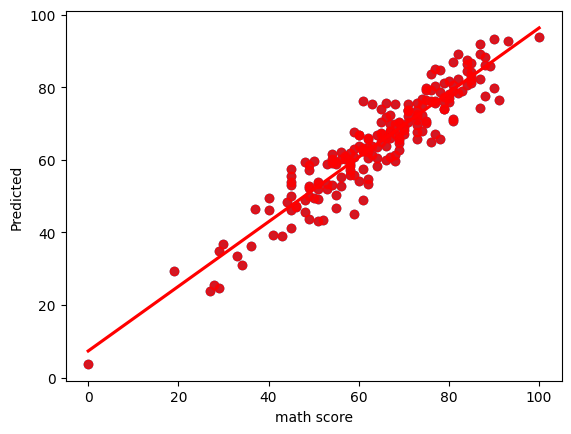

In [34]:
#plot y_pred & y_test 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

sns.regplot(x=y_test,y=y_pred,ci=None,color='red')